In [1]:
from numpy import *
from pylab import *
import matplotlib as plt
from scipy import integrate

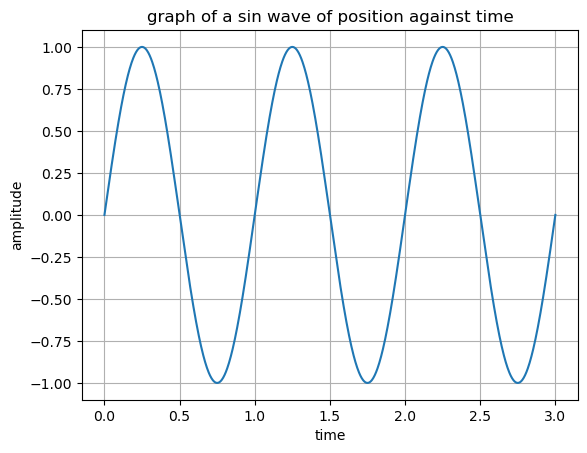

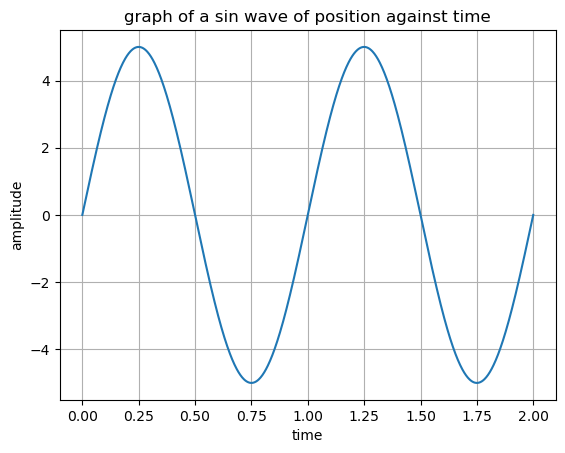

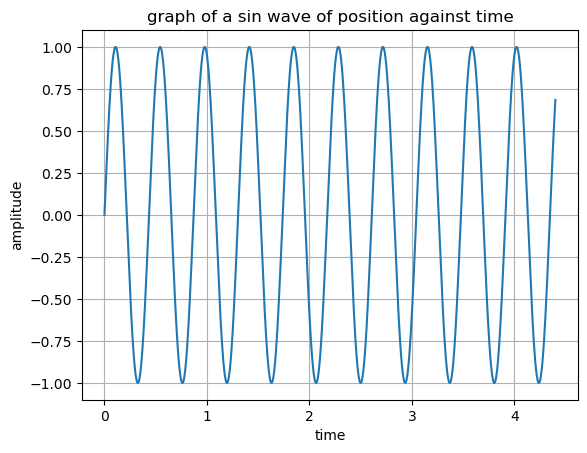

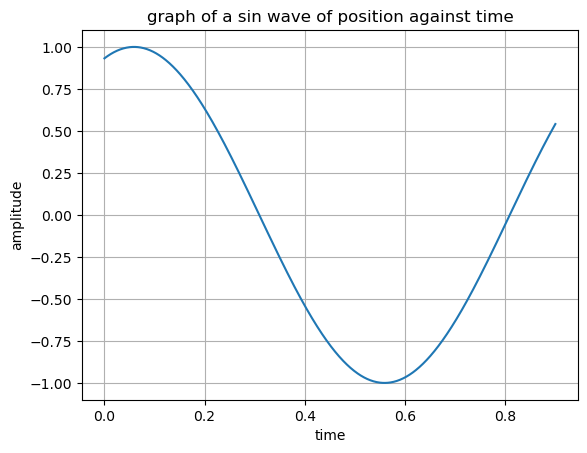

In [11]:
#ex1
def func1(time,amplitude=1,frequency=1,phase=0):
    
    x = linspace(0, time, 1000)
    y = amplitude * np.sin(2 * np.pi * frequency * x + phase)
    plot(x, y)
    grid()
    xlabel("time")
    ylabel("amplitude")
    title("graph of a sin wave of position against time")
    show()

func1(3)
func1(2, amplitude=5)
func1(4.4, frequency=2.3)
func1(0.9, phase=1.2)

#ex2q1


In [17]:
#ex2
def height(T):
    M = 5.97e24
    R = 6.378e6
    G = 6.674e-11
    h = (((G*M*T*T)/(4*np.pi*np.pi))**(1/3)) - R
    hKM = round(h/1000, 2)
    print(f"altitude: {hKM}km")

day = 24*60*60
height(day)
height(90*60)
height(45*60)
print("conclusion: not possible to orbit once in 45 mins as the required height is below the surface of the earth.")
time = int(input("what is the time period T?\n"))
print(height(time))

altitude: 35857.35km
altitude: 273.65km
altitude: -2187.72km
conclusion: not possible to orbit once in 45 mins as the required height is below the surface of the earth.


what is the time period T?
 543853495


altitude: 14392264.48km
None


In [7]:
%%writefile func.py
#ex3
import numpy as np
from matplotlib import *
from pylab import *
import math
from scipy import integrate

def linfit(x, y):
    xArray = x
    yArray = y
    pCoeff, residuals, _, _, _ = polyfit(xArray, yArray, 1, full=True)
    p = poly1d(pCoeff)
    x = linspace(min(xArray), max(xArray), 100)
    n = len(xArray)
    D = sum(xArray**2) - 1/n *sum(xArray)**2
    xBar = mean(xArray)
    dmSqrd = 1/(n-2)*residuals/D
    dcSqrd = 1/(n-2)*(D/n + xBar**2)*residuals/D
    dm = sqrt(dmSqrd)
    dc = sqrt(dcSqrd)
    m, c = pCoeff
    return m, dm, c, dc

Overwriting func.py


gradient: 1.0121703853955366 +/- [0.01887609]
intercept: -0.689898580121699 +/- [0.08180558]


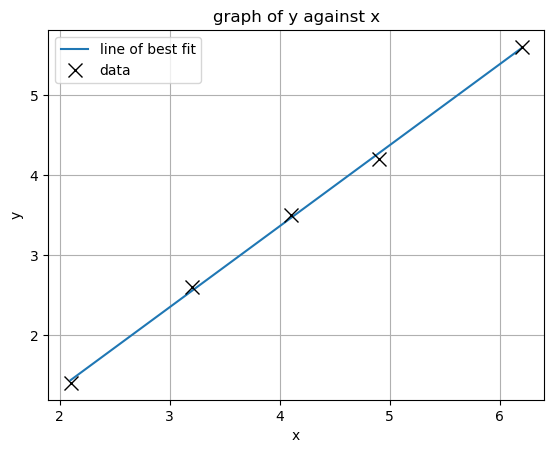

In [19]:
import func as lf
import numpy as np
from matplotlib.pyplot import *
import math
from pylab import *
xTest = np.array([2.1,3.2,4.1,4.9,6.2])
yTest = np.array([1.4,2.6,3.5,4.2,5.6])
m, dm, c, dc = lf.linfit(xTest, yTest)
pCoeff, residuals, _, _, _ = polyfit(xTest, yTest, 1, full=True)
p = poly1d(pCoeff)
x = linspace(min(xTest), max(xTest), 100)
plot(x, p(x), label = "line of best fit")
plot(xTest, yTest, "kx", markersize = 10, label = "data")
title("graph of y against x")
xlabel("x")
ylabel("y")
legend()
grid()
print("gradient: {} +/- {}".format(m, dm))
print("intercept: {} +/- {}".format(c, dc))